# Calibration

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from radar.data import load
from radar.processing import signal_intensity

import matplotlib
matplotlib.rc('font', size=16)

## Calibration parameters

### Ball

The radar was pointed at a steel ball that moved back and forth at an approximately constant speed.
I measured the travel time over the distance of 1 m for 10 revolutions.
I calculate the ball speed by averaging the measured times and by dividing the travel distance by that time.

In [2]:
ball_distance = 1 # m
ball_times = np.array([6.36, 6.48, 6.50, 6.48, 6.44, 6.42, 6.54, 6.42, 6.46, 6.41])
ball_speed = ball_distance / np.mean(ball_times) # m/s

In [3]:
ball_speed

0.1550147263990079

### Geometry

Inclination angle:

$$
\theta_i = 18.4^\circ
$$

Height of radar head from target (calibration device):

$$
h = 0.57\ m
$$

Distance of radar head from target (center of the calibration device):

$$
d = h \cos{\theta_i}
$$

In [4]:
theta_i = np.deg2rad(18.4)
h = 0.57
d = h / np.sin(theta_i)

In [5]:
path = 'data/calibration/20210709-180442.h5'

In [6]:
time, ref, Hpol, Vpol = load(path)

In [7]:
num_samples, num_records = ref.shape

In [8]:
dt = np.diff(time).mean()
time = np.linspace(time[0], time[-1] + dt, num_samples * num_records, endpoint=True)

In [9]:
rho_h = signal_intensity(Hpol.real, Hpol.imag).flatten()
rho_v = signal_intensity(Vpol.real, Vpol.imag).flatten()
rho_ref = signal_intensity(ref.real, ref.imag).flatten()

## Signal intensity

$$
\rho = I^2 + Q^2
$$

where:

* $\rho$: Signal intensity
* $I$: In-phase signal (real component)
* $Q$: Quadrature signal (imaginary component)

Text(0.5, 0, 'Time [s]')

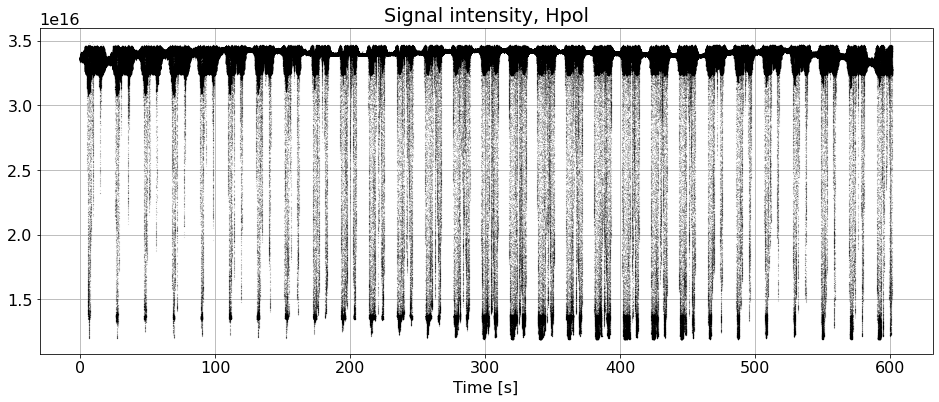

In [10]:
plt.figure(figsize=(16, 6))
plt.plot(time, rho_h, 'k.', ms=0.1)
plt.title('Signal intensity, Hpol')
plt.grid()
plt.xlabel('Time [s]')

Text(0.5, 0, 'Time [s]')

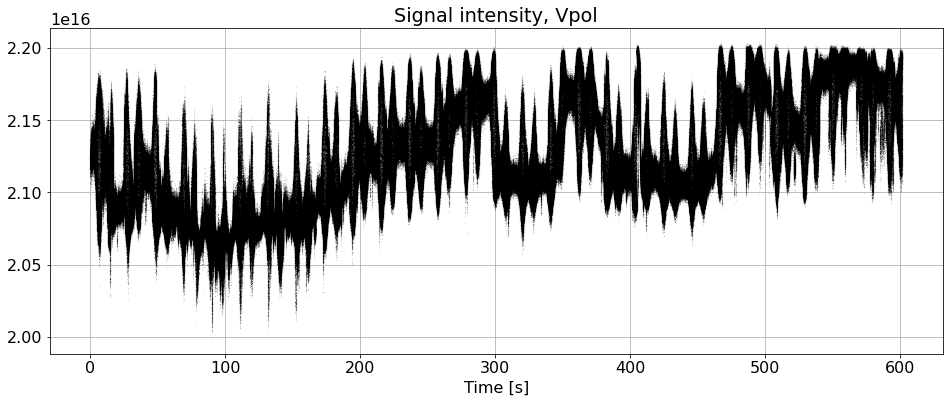

In [11]:
plt.figure(figsize=(16, 6))
plt.plot(time, rho_v, 'k.', ms=0.1)
plt.title('Signal intensity, Vpol')
plt.grid()
plt.xlabel('Time [s]')

Text(0.5, 0, 'Time [s]')

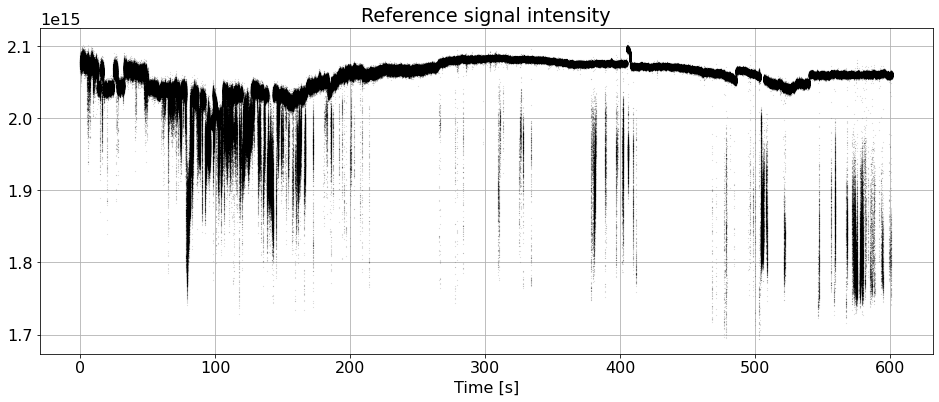

In [12]:
plt.figure(figsize=(16, 6))
plt.plot(time, rho_ref, 'k.', ms=0.1)
plt.title('Reference signal intensity')
plt.grid()
plt.xlabel('Time [s]')

## Signal intensity, normalized by the reference signal

$$
\rho_{n} = (I^2 + Q^2) / R^2
$$

where:

* $R$: Reference signal

Text(0.5, 0, 'Time [s]')

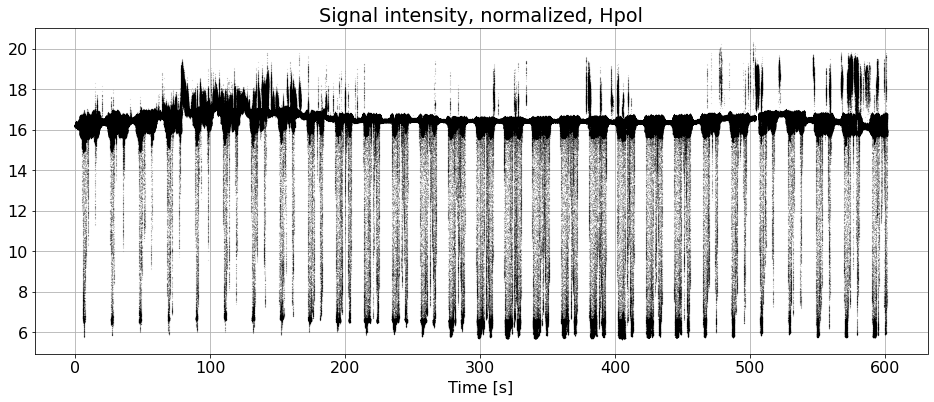

In [13]:
plt.figure(figsize=(16, 6))
plt.plot(time, rho_h / rho_ref, 'k.', ms=0.1)
plt.title('Signal intensity, normalized, Hpol')
plt.grid()
plt.xlabel('Time [s]')

Text(0.5, 0, 'Time [s]')

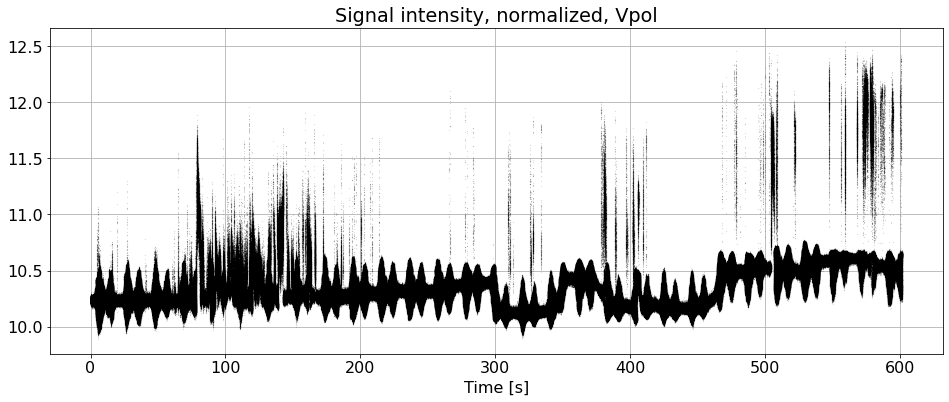

In [14]:
plt.figure(figsize=(16, 6))
plt.plot(time, rho_v / rho_ref, 'k.', ms=0.1)
plt.title('Signal intensity, normalized, Vpol')
plt.grid()
plt.xlabel('Time [s]')

## Zoom in on one ball revolution

(9.8, 10.8)

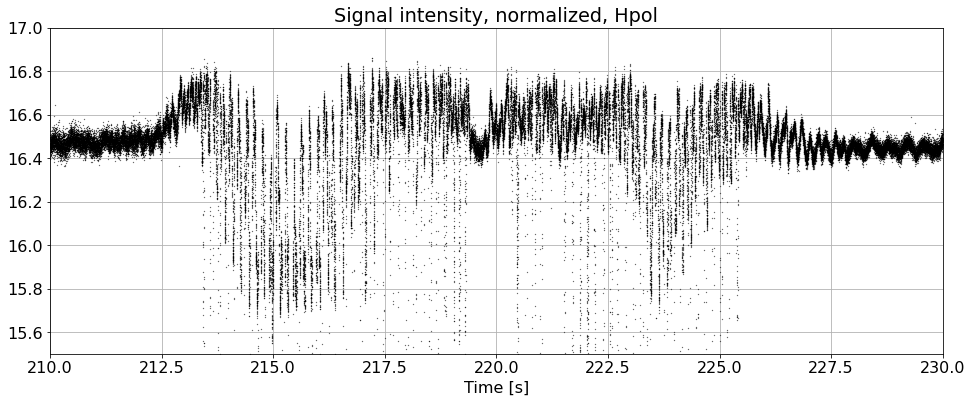

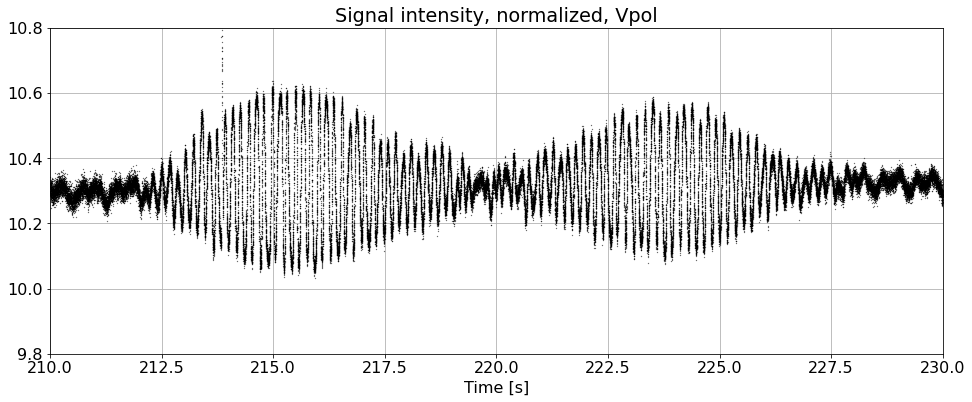

In [15]:
plt.figure(figsize=(16, 6))
plt.plot(time, rho_h / rho_ref, 'k.', ms=0.5)
plt.title('Signal intensity, normalized, Hpol')
plt.grid()
plt.xlabel('Time [s]')
plt.xlim(210, 230)
plt.ylim(15.5, 17)

plt.figure(figsize=(16, 6))
plt.plot(time, rho_v / rho_ref, 'k.', ms=0.5)
plt.title('Signal intensity, normalized, Vpol')
plt.grid()
plt.xlabel('Time [s]')
plt.xlim(210, 230)
plt.ylim(9.8, 10.8)